In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
from folium import plugins
import datetime as dt
import folium
import os
import sys
import gmplot
import webbrowser
from folium.plugins import FastMarkerCluster,HeatMap
from selenium import webdriver
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap



%matplotlib inline 
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv('data/incidenti_2007_2017.csv')
df['DataOraIncidente'] = df['DataOraIncidente'].apply(lambda d: pd.to_datetime(d))
COORD_ROMA = df[~df['Latitudine'].isnull()][['Latitudine','Longitudine']].mean().values.tolist()
COORD_ROMA

[41.88580290898124, 12.488439564508845]

In [39]:
m = folium.Map(
    location=[COORD_ROMA[0],COORD_ROMA[1]],
    zoom_start=12,
    tiles='cartodbpositron',
    #tiles='Stamen',
    #attr='Terrain',
    prefer_canvas=True,
    width='50%',
    height='50%')

columns = ['Latitudine',
           'Longitudine',
           'DataOraIncidente',
           'NaturaIncidente',
           'CondizioneAtmosferica',
           'FondoStradale',
           'Traffico']



for i in range(len(df_temp)):
    row = df_temp.iloc[i]
    folium.Circle(
        location=[row['Latitudine'],row['Longitudine']],
        radius=3,
        color='#0078ff80'
    ).add_to(m)
#m
    #time.sleep(5) 
m.save('temp.html')
#webbrowser.open('file://' + os.path.realpath("maps/incidenti_deceduti.html"))

In [25]:
def f():
    for i in range(len(df_temp)):
        row = df_temp.iloc[i]
        folium.Circle(
            location=[row['Latitudine'],row['Longitudine']],
            radius=3,
            color='#0078ff80'
        ).add_to(m)
    return(m)

for i in range(3):
    f().
    time.sleep(2) 

In [34]:
for i in range(len(df_temp)):
    row = df_temp.iloc[i]
    folium.Circle(
        location=[row['Latitudine'],row['Longitudine']],
        radius=3,
        color='#0078ff80'
    ).add_to(m)
    m.render()

In [44]:
COORD_ROMA[0]

41.88580290898124

/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


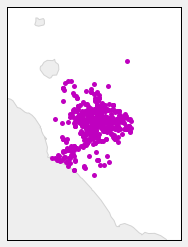

In [79]:
df_temp = df[(~df['Latitudine'].isnull()) & (df['NUM_MORTI']>0)][columns]


fig = plt.figure(figsize=(4,4))
DELTA = 0.5
m = Basemap(projection='merc',
                 resolution='h',
                 llcrnrlon=COORD_ROMA[1]-DELTA,
                 llcrnrlat=COORD_ROMA[0]-DELTA,
                 urcrnrlon=COORD_ROMA[1]+DELTA,
                 urcrnrlat=COORD_ROMA[0]+DELTA)

m.drawcoastlines(color='lightgray')
m.drawcountries(color='lightgray')
m.fillcontinents(color='white', lake_color='#eeeeee');
m.drawmapboundary(fill_color='#eeeeee')


for i in range(len(df_temp)):
    row = df_temp.iloc[i]
    x1,y1 = m(row['Longitudine'],row['Latitudine'])
    m.plot(x1, y1, 'm.', markersize=10)
    path = 'maps/incidenti_gif/map_{num:05d}.png'.format(num=i)
    #print(path)
    fig.savefig(path)

/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


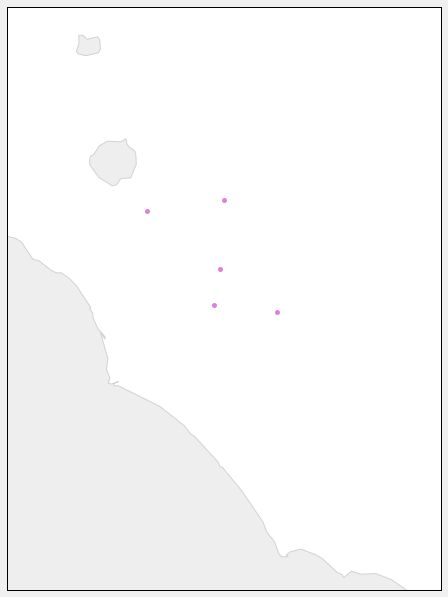

In [86]:
df_temp = df[(~df['Latitudine'].isnull()) & 
             (df['NUM_MORTI']>0)][columns].head()


fig = plt.figure(figsize=(20,10))
DELTA = 0.5
m = Basemap(projection='merc',
             resolution='h',
             llcrnrlon=COORD_ROMA[1]-DELTA,
             llcrnrlat=COORD_ROMA[0]-DELTA,
             urcrnrlon=COORD_ROMA[1]+DELTA,
             urcrnrlat=COORD_ROMA[0]+DELTA)

m.drawcoastlines(color='lightgray')
m.drawcountries(color='lightgray')
m.fillcontinents(color='white', lake_color='#eeeeee');
m.drawmapboundary(fill_color='#eeeeee')


for i in range(len(df_temp)):
    row = df_temp.iloc[i]
    x1,y1 = m(row['Longitudine'],row['Latitudine'])
    m.plot(x1, y1, 'm.', markersize=10, alpha=0.5)
    path = 'maps/incidenti_gif/map_{num:05d}.png'.format(num=i)
    #print(path)
    #fig.savefig(path)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#from functions_domains_models import *

from mpl_toolkits.basemap import Basemap


# Define the map boundaries lat/lon
# domain = get_domain('salt_lake_valley')
# top_right_lat = domain['top_right_lat']+.1
# top_right_lon = domain['top_right_lon']-.1
# bot_left_lat = domain['bot_left_lat']
# bot_left_lon = domain['bot_left_lon']

## Map in cylindrical projection (data points may apear skewed)
m = Basemap(resolution='i',projection='cyl',\
    llcrnrlon=COORD_ROMA[1]-DELTA,
             llcrnrlat=COORD_ROMA[0]-DELTA,
             urcrnrlon=COORD_ROMA[1]+DELTA,
             urcrnrlat=COORD_ROMA[0]+DELTA)


map_list = [
            'ESRI_Imagery_World_2D',    # 0
            'ESRI_StreetMap_World_2D',  # 1
            'NatGeo_World_Map',         # 2
            'NGS_Topo_US_2D',           # 3
            #'Ocean_Basemap',            # 4
            'USA_Topo_Maps',            # 5
            'World_Imagery',            # 6
            'World_Physical_Map',       # 7     Still blurry
            'World_Shaded_Relief',      # 8
            'World_Street_Map',         # 9
            'World_Terrain_Base',       # 10
            'World_Topo_Map'            # 11
            ]

for maps in map_list: 
    plt.figure(figsize=[10,20])    
    ## Instead of using WRF terrain fields you can get a high resolution image from ESRI
    m.arcgisimage(service=maps, xpixels = 3500, dpi=500, verbose= True)
    m.drawstates()
    plt.title(maps)
    
    plt.savefig('00'+maps,bbox_inches="tight")

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=11.988439564508843,41.38580290898124,12.988439564508846,42.38580290898125&bboxSR=4326&imageSR=4326&size=3500,3500&dpi=500&format=png32&f=image


/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=11.988439564508843,41.38580290898124,12.988439564508846,42.38580290898125&bboxSR=4326&imageSR=4326&size=3500,3500&dpi=500&format=png32&f=image


http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/export?bbox=12.288439564508845,41.68580290898124,12.688439564508844,42.08580290898124&bboxSR=4326&imageSR=4326&size=2000,2000&dpi=500&format=png32&f=image


/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


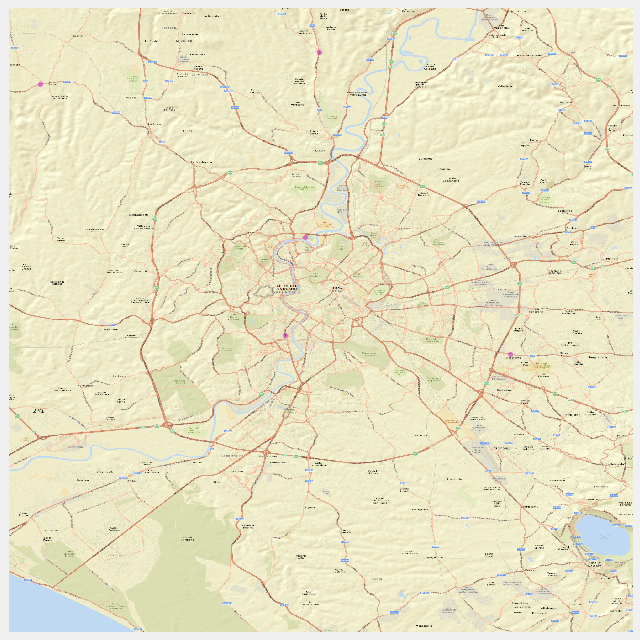

In [16]:
DELTA = 0.2
m = Basemap(resolution='i',projection='cyl',\
    llcrnrlon=COORD_ROMA[1]-DELTA,
             llcrnrlat=COORD_ROMA[0]-DELTA,
             urcrnrlon=COORD_ROMA[1]+DELTA,
             urcrnrlat=COORD_ROMA[0]+DELTA)

df_temp = df[(~df['Latitudine'].isnull()) & 
             (df['NUM_MORTI']>0)].head()
# map_list = [
#             'ESRI_Imagery_World_2D',    # 0
#             'ESRI_StreetMap_World_2D',  # 1
#             'NatGeo_World_Map',         # 2
#             'NGS_Topo_US_2D',           # 3
#             #'Ocean_Basemap',            # 4
#             'USA_Topo_Maps',            # 5
#             'World_Imagery',            # 6
#             'World_Physical_Map',       # 7     Still blurry
#             'World_Shaded_Relief',      # 8
#             'World_Street_Map',         # 9
#             'World_Terrain_Base',       # 10
#             'World_Topo_Map'            # 11
#             ]


plt.figure(figsize=[10,20])    
## Instead of using WRF terrain fields you can get a high resolution image from ESRI
m.arcgisimage(service='World_Street_Map', 
              xpixels = 2000, 
              dpi=500, 
              verbose= True)
m.drawstates()

for i in range(len(df_temp)):
    row = df_temp.iloc[i]
    x1,y1 = m(row['Longitudine'],row['Latitudine'])
    m.plot(x1, y1, 'm.', markersize=10, alpha=0.5)
    #path = 'maps/incidenti_gif/map_{num:05d}.png'.format(num=i)
    #print(path)
    #fig.savefig(path)


#plt.title(maps)  
plt.show()